In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

MODEL

In [9]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(197, 19)
(66, 19)
(197,)
(66,)


In [11]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [12]:
pls_model = PLSRegression(n_components=6).fit(X_train, y_train)

In [13]:
pls_model.coef_

array([[-7.61286812e-01,  4.57448755e+00,  2.54126010e+00,
         1.07106967e+00, -1.01361681e+00,  2.58433140e+00,
        -5.46380518e+00,  2.31449384e-03,  1.35139548e-01,
         3.15227293e-01,  3.03692473e-01,  2.09596725e-01,
        -2.33784342e-01,  3.05287340e-01,  1.88196616e-01,
        -7.13039193e+00,  1.54012829e+02, -7.15497669e+01,
        -9.13041778e+01]])

PREDICTION

In [14]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,True,False,True
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,True,False,True
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,False,True,False
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,False,False,False
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,True,True,True


In [15]:
pls_model.predict(X_train)[0:10]

array([ 341.05563915,  818.68494511,  609.92707458,  125.15977454,
        458.61602947, 1043.93221907,  172.32918764,  317.29628026,
        518.8844206 ,  915.63364085])

In [16]:
y_pred = pls_model.predict(X_train)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

np.sqrt(mean_squared_error(y_train, y_pred))

298.0184320581615

In [18]:
r2_score(y_train, y_pred)

0.5512193616082298

In [19]:
y_pred_test = pls_model.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

370.20535521687447

Model Tuning

In [21]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [24]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*
        cross_val_score(pls, 
                        X_train, 
                        y_train, 
                        scoring='neg_mean_squared_error', 
                        cv=cv_10).mean())
    RMSE.append(np.sqrt(score))

Text(0.5, 1.0, 'Salary')

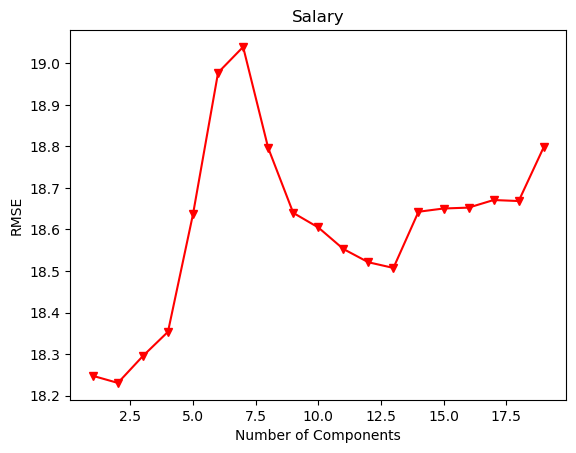

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('Salary')

In [ ]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train) #optimal number of components

In [28]:
y_pred = pls_model.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526